In [1]:
# Thhis tutorial will work with hierarichal clustering 
# We will need the following:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [2]:
# This will make the printouts easier ...
np.set_printoptions(precision=5, suppress=True)

(150, 2)


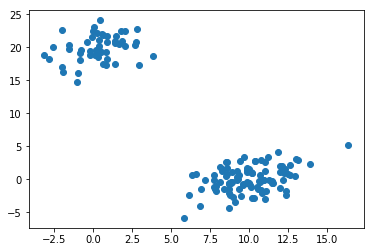

In [3]:
# We will generate a sample dataset first ...
# generate two clusters: a with 100 points, b with 50:
np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [5]:
# How to check the quality of the clustering? 
# One way is check the Cophenetic Correlation Coefficient of your clustering 
# with help of the cophenet() function. This compares (correlates) the actual 
# pairwise distances of all your samples to those implied by the 
# hierarchical clustering.

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.98001483875742679

In [6]:
# Worked well. Z[i] will tell us which clusters were merged in the 
# i-th iteration

Z[0]

array([ 52.     ,  53.     ,   0.04151,   2.     ])

In [7]:
# Format: [idx1, idx2, dist, sample_count].
Z[:20]

array([[  52.     ,   53.     ,    0.04151,    2.     ],
       [  14.     ,   79.     ,    0.05914,    2.     ],
       [  33.     ,   68.     ,    0.07107,    2.     ],
       [  17.     ,   73.     ,    0.07137,    2.     ],
       [   1.     ,    8.     ,    0.07543,    2.     ],
       [  85.     ,   95.     ,    0.10928,    2.     ],
       [ 108.     ,  131.     ,    0.11007,    2.     ],
       [   9.     ,   66.     ,    0.11302,    2.     ],
       [  15.     ,   69.     ,    0.11429,    2.     ],
       [  63.     ,   98.     ,    0.1212 ,    2.     ],
       [ 107.     ,  115.     ,    0.12167,    2.     ],
       [  65.     ,   74.     ,    0.1249 ,    2.     ],
       [  58.     ,   61.     ,    0.14028,    2.     ],
       [  62.     ,  152.     ,    0.1726 ,    3.     ],
       [  41.     ,  158.     ,    0.1779 ,    3.     ],
       [  10.     ,   83.     ,    0.18635,    2.     ],
       [ 114.     ,  139.     ,    0.20419,    2.     ],
       [  39.     ,   88.     ,

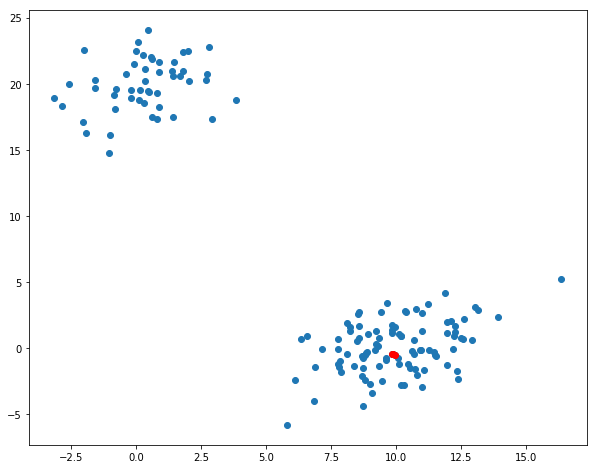

In [8]:
# In the 13th step the algorithm merged a point and an existing cluster - 
# hence the number 152 since the original dataset only had 150 indices
# Cluster 152 refers to the cluster formed in the interation 2, combing 33 and 68.
# So in the original dataset, datapoints 33, 68, and 62 should be close together.
# Let's see ...
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

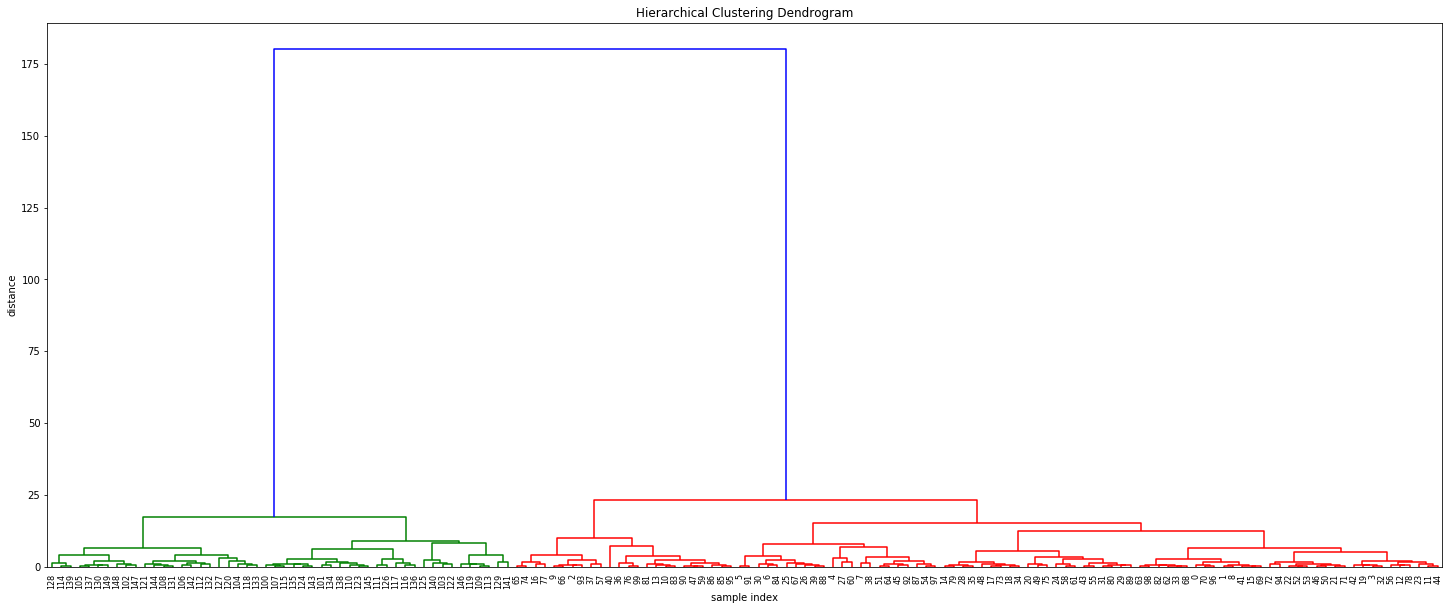

In [9]:
# We can actually plot the entire dendogram:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

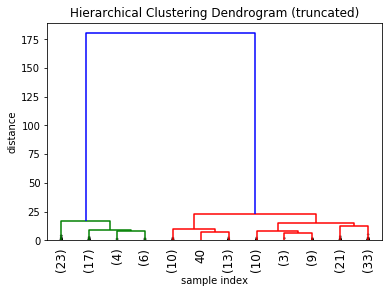

In [10]:
# Let's truncate off the bottomw ...


plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()



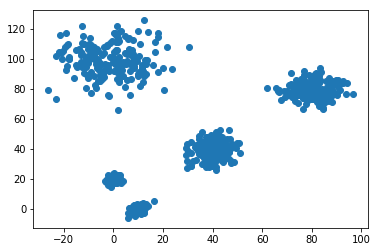

In [11]:
# Let's try a more complex example ...


c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size=[200,])
X2 = np.concatenate((X, c, d, e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()



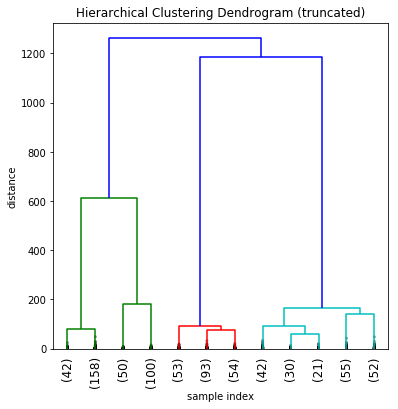

In [12]:
Z2 = linkage(X2, 'ward')
plt.figure(figsize=(6,6))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z2,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [13]:
# How to get the cluster values?

from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
# This command does the same, but without specifying a distance:
k=4
clusters=fcluster(Z, k, criterion='maxclust')

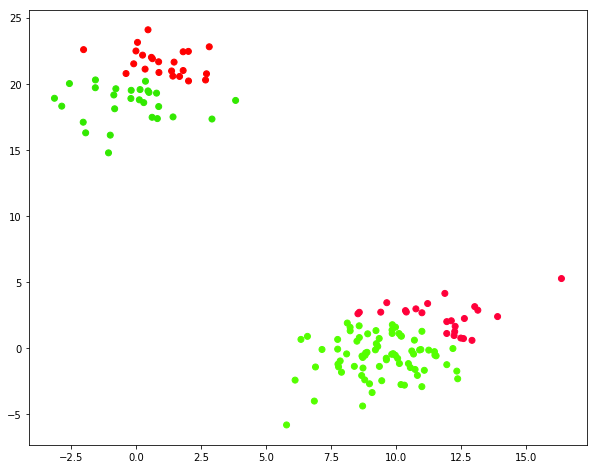

In [15]:
# Finally, here is a plot of the clusters:

plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()